In [1]:
import torch
import torch.nn as nn

c:\Users\jakub\machine_learning\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# IOU

In [17]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None 

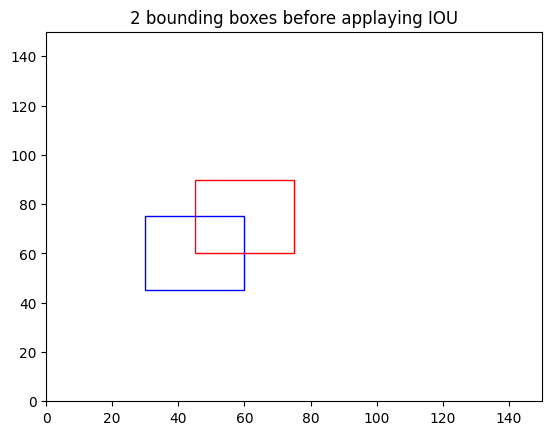

In [66]:
fig, ax = plt.subplots()

target = np.array([30,45,60,75])  
pred = np.array([45, 60, 75, 90]) 

ax.add_patch(Rectangle((target[0], target[1]), target[2] -target[0], target[3] - target[1],
                       edgecolor='blue', facecolor='none'))
ax.add_patch(Rectangle((pred[0], pred[1]), pred[2] - pred[0], pred[3] - pred[1], 
                       edgecolor='red', facecolor='none'))
ax.set_ylim([0, 150])
ax.set_xlim([0, 150])
plt.title('2 bounding boxes before applaying IOU')
plt.show()

In [81]:
target = np.array([30,45,60,75])  
pred = np.array([45, 60, 75, 90]) 

if target[0] > pred[2] or pred[0] > target[2]:
    print('IOU 0')
    #break
if target[1] > pred[3] or pred[1] > target[3]:
    print('IOU 0')
    #break
tmp_x =  min([target[2], pred[2]])  - max([target[0], pred[0]])

tmp_y = min([target[3], pred[3]]) - max([target[1], pred[1]])

# +1 for the pixels on the edges
target_area = (target[2] + 1 - target[0] ) * (target[3] + 1- target[1])
pred_area = (pred[2] + 1- pred[0]) * (pred[3]+ 1 - pred[1])
area_of_overlap = (tmp_x+1) * (tmp_y + 1)
union_area = target_area + pred_area - area_of_overlap
print(f'target area: {target_area}')
print(f'pred area: {pred_area}')

print(f"area of overlap: {area_of_overlap}")
print(f'Union area: {union_area}')
print(f'IOU: {area_of_overlap / union_area:.5f}')



target area: 961
pred area: 961
area of overlap: 256
Union area: 1666
IOU: 0.15366


# Average Precision step by step

In [6]:
df =pd.DataFrame({'Images': ['Image1', 'Image1', 'Image1',
                              'Image2', 'Image2', 'Image2',
                              'Image3', 'Image3', 'Image3', 'Image3', 'Image3'],
                  'Detection_ID': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'],
                  'C' : [88, 70, 80, 71, 54, 74, 18, 67, 38, 91, 44],
                  'TP_FP' : ['FP', 'TP', 'FP', 'FP', 'TP', 'FP', 'TP', 'FP', 'FP', 'TP', 'FP']})

In [8]:
df

,Images,Detection_ID,C,TP_FP
0,Image1,A,88,FP
1,Image1,B,70,TP
2,Image1,C,80,FP
3,Image2,D,71,FP
4,Image2,E,54,TP
5,Image2,F,74,FP
6,Image3,G,18,TP
7,Image3,H,67,FP
8,Image3,I,38,FP
9,Image3,J,91,TP


1. sort by confidence

In [11]:
df.sort_values(by='C', ascending=False)

,Images,Detection_ID,C,TP_FP
9,Image3,J,91,TP
0,Image1,A,88,FP
2,Image1,C,80,FP
5,Image2,F,74,FP
3,Image2,D,71,FP
1,Image1,B,70,TP
7,Image3,H,67,FP
4,Image2,E,54,TP
10,Image3,K,44,FP
8,Image3,I,38,FP


2. Count Precision and Recall

In [21]:
df['TP'] = 0
df['FP'] = 0

df['Precision'] = 0
df['Recall'] = 0

df['TP'].loc[df['TP_FP'] == 'TP'] = 1
df['FP'].loc[df['TP_FP'] == 'FP'] = 1
df

,Images,Detection_ID,C,TP_FP,TP,FP,Precision,Recall
0,Image1,A,88,FP,0,1,0,0
1,Image1,B,70,TP,1,0,0,0
2,Image1,C,80,FP,0,1,0,0
3,Image2,D,71,FP,0,1,0,0
4,Image2,E,54,TP,1,0,0,0
5,Image2,F,74,FP,0,1,0,0
6,Image3,G,18,TP,1,0,0,0
7,Image3,H,67,FP,0,1,0,0
8,Image3,I,38,FP,0,1,0,0
9,Image3,J,91,TP,1,0,0,0
